In [1]:
import re
import numpy as np
import pandas as pd
from pprint import pprint
import pickle
import numpy as np

# Gensim
import gensim
from gensim import corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models import ldamulticore
#from gensim.parsing.preprocessing import STOPWORDS

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import  pyLDAvis.gensim # don't skip this
from matplotlib import pyplot as plt


import nltk

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

C:\Users\Xiaomeng\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
C:\Users\Xiaomeng\Anaconda3\lib\site-packages\funcy\colls.py:6: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping, Set, Iterable, Iterator, defaultdict
C:\Users\Xiaomeng\Anaconda3\lib\site-packages\funcy\colls.py:6: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping, Set, Iterable, Iterator, defaultdict
C:\Users\Xiaomeng\Anaconda3\lib\site-packages\funcy\flow.py:2: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from coll

In [2]:
import os
cwd = os.getcwd()
data_dir = os.path.join(cwd,'Category Dataframe')
os.chdir(data_dir)
data_dir

'C:\\Users\\Xiaomeng\\OneDrive\\Project\\Category Dataframe'

In [3]:
# save train and test data index in to pickle
f =open('data_lemmatized.pkl','rb')
data_lemmatized =pickle.load(f)
f.close()

In [4]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

from sklearn.model_selection import train_test_split

corpus_index = [i for i in range(len(corpus))]

train, test, train_index, test_index = train_test_split(corpus, corpus_index, test_size=0.33, random_state=42)
print(train[:1])
print(test[:1])
print(train_index[0])
print(test_index[0])

[[(4, 1), (14, 1), (43, 1), (60, 1), (119, 1), (659, 1), (1366, 1), (9780, 1), (22959, 1), (22960, 1), (22961, 1)]]
[[(43, 1), (322, 1), (408, 1), (419, 1), (435, 2), (554, 1), (954, 1), (1127, 1), (2243, 2), (3245, 1), (4325, 2), (5030, 1), (7567, 1)]]
9644
104400


# Find optimal number of topics

In [28]:
def compute_metrics(dictionary,train,test,texts,n_list):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    from gensim.models.coherencemodel import CoherenceModel
    coherence_values = []
    model_list = []
    perplexity_values = []
    for num_topics in n_list:
        t0 = time()
        
        print('================================ N_topics %f =====================================' %num_topics)
        filename = 'model_n_{0}.sav'.format(num_topics)
        model = pickle.load(open(filename, 'rb'))
        
        model_list.append(model)
        # Compute Coherence Score
        coherence_model = CoherenceModel(model = model, corpus=test,texts=data_lemmatized, dictionary=dictionary, coherence='c_npmi')
        coherence = coherence_model.get_coherence()
        coherence_values.append(coherence)
        
        print('Coherence Score:test=%.3f' %coherence)
        
        # Compute Perplexity 
        #perplexity = model.log_perplexity(test)
        #print('preplexity: test=%.3f' %perplexity)
        #perplexity_values.append(perplexity)
        
              
        print("done in %0.3fs." %(time() - t0))
    return model_list, coherence_values,perplexity_values

In [ ]:
filename = 'model_n_{0}.sav'.format(5)
model = pickle.load(open(filename, 'rb'))

In [5]:
# Can take a long time to run.
from gensim.models.coherencemodel import CoherenceModel
from time import time
n_list = [5,10,15,20,25,30,40,50,60,70,80]
model_list, coherence_values, perplexity_values = compute_metrics(dictionary=id2word, train=train, test = test,texts=data_lemmatized, n_list = n_list)

NameError: name 'compute_metrics' is not defined

In [6]:
cv_values = []
n_list = [5,10,15,20,25,30,40,50,60,70,80,90]
for num_topics in n_list:
    t0 = time()
    print('================================ N_topics %f =====================================' %num_topics)
    filename = 'model_n_{0}.sav'.format(num_topics)
    model = pickle.load(open(filename, 'rb'))
    coherence_model = CoherenceModel(model = model,texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    cv = coherence_model.get_coherence()
    cv_values.append(cv)
    print('Cv Score:test=%.3f' %cv)
    print("done in %0.3fs." %(time() - t0))

================================ N_topics 5.000000 =====================================
Cv Score:test=0.307
done in 8.978s.
================================ N_topics 10.000000 =====================================
Cv Score:test=0.343
done in 11.502s.
================================ N_topics 15.000000 =====================================
Cv Score:test=0.384
done in 20.277s.
================================ N_topics 20.000000 =====================================
Cv Score:test=0.361
done in 28.322s.
================================ N_topics 25.000000 =====================================
Cv Score:test=0.405
done in 27.065s.
================================ N_topics 30.000000 =====================================
Cv Score:test=0.406
done in 28.992s.
================================ N_topics 40.000000 =====================================
Cv Score:test=0.443
done in 35.717s.
================================ N_topics 50.000000 =====================================
Cv Score:test=0.436
don

In [ ]:
# Show graph
x = [5,10,15,20,25,30,40,50,60,70,80]
plt.plot(x, coherence_values[:11])
plt.xlabel("Num Topics")
plt.ylabel("Coherence score:c")
plt.legend(("coherence_values"), loc='best')
plt.show()

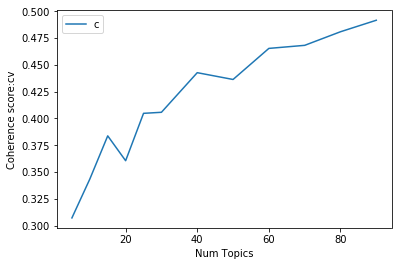

In [7]:
# Show graph

x = [5,10,15,20,25,30,40,50,60,70,80,90]
plt.plot(x, cv_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score:cv")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

# Build LDA

In [ ]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=train,
                                           id2word=id2word,
                                           num_topics=30, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
lda_model.save("lda_model_gensim")

In [ ]:
lda_model

In [ ]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics(30))
doc_lda = lda_model[test]

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

In [ ]:
theta, _ = lda_model.inference(train)
theta /= theta.sum(axis=1)[:, None]
theta_df_train = pd.DataFrame(theta)

theta, _ = lda_model.inference(test)
theta /= theta.sum(axis=1)[:, None]
theta_df_test = pd.DataFrame(theta)


from sklearn import svm
x = theta_df_train
y = list(all_data_df.iloc[train_index]['category'])

clf = svm.LinearSVC()
clf.fit(x,y)
result = clf.predict(theta_df_test)

i = 0
for y,y_pred in zip(all_data_df.iloc[test_index]['category'],result):
    if y == y_pred:
        i +=1
        
print(i/len(result)*100)

In [ ]:
from sklearn.manifold import TSNE 
tsne = TSNE(n_components=2, perplexity=50)

# TSNE is taking too long for bigger dataset
#reduced_X = theta_df_test.sample(n=5000)
tsne_data = tsne.fit_transform(theta_df_test)
tsne_data = pd.DataFrame(tsne_data, columns=["dim1", "dim2"])
tsne_data.plot("dim1", "dim2", kind="scatter")

# Visualization

In [ ]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dct,mds='tsne',sort_topics=False)
pyLDAvis.display(vis)

In [ ]:
pyLDAvis.save_html(vis, 'lda.html')

In [ ]:
# Select the model and print the topics
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

# t - sne Visulization 

In [ ]:
theta, _ = lda_model_2.inference(train)
theta /= theta.sum(axis=1)[:, None]
theta_df_train = pd.DataFrame(theta)

theta, _ = lda_model_2.inference(test)
theta /= theta.sum(axis=1)[:, None]
theta_df_test = pd.DataFrame(theta)

# SVM

In [ ]:
from sklearn import svm
x = theta_df_train
y = list(all_data_df.iloc[train_index]['category'])

clf = svm.LinearSVC()
clf.fit(x,y)
result = clf.predict(theta_df_test)

i = 0
for y,y_pred in zip(all_data_df.iloc[test_index]['category'],result):
    if y == y_pred:
        i +=1
        
print(i/len(result)*100)

# PCA

# Building LDA Mallet Model

In [ ]:
import os
from gensim.models.wrappers import LdaMallet
os.environ.update({'MALLET_HOME':r'C:/Xiaomeng/mallet/'})
mallet_path = 'C:\\Xiaomeng\\mallet\\bin\\mallet' # update this path

#ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=3, id2word=id2word)

#result = (ldamallet.show_topics(num_topics=3, num_words=10,formatted=False))
#for each in result:
#print (each)
#os.environ['MALLET_HOME'] = 'C:/Users/Xiaomeng/OneDrive/Project/Category Dataframe/mallet'
#mallet_path = 'C:/Users/Xiaomeng/OneDrive/Project/Category Dataframe/mallet/bin/mallet' # update this path
#mallet_path = 'C:\Users\Xiaomeng\OneDrive\Project\Category Dataframe\mallet\bin\mallet' # update this path
ldamallet = LdaMallet(mallet_path, corpus=train, num_topics=30, id2word=id2word)

In [ ]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
mode

In [ ]:
# Build LDA model with the result from hyperparameter tuning
lda_model_2 = gensim.models.LdaMulticore(corpus=train,
                                           id2word=id2word,
                                           num_topics=30, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.6,
                                            eta=0.05,
                                           per_word_topics=True)

lda_model_2.save("lda_model2_gensim")

In [ ]:
lda_model_2 = gensim.models.LdaModel.load("lda_model2_gensim")
theta, _ = lda_model_2.inference(train)
theta /= theta.sum(axis=1)[:, None]
theta_df_test = pd.DataFrame(theta)
tsne = TSNE(n_components=2, perplexity=50)

# Clean and sample the data from each categories
#theta_df_clean = theta_df[ theta_df['category'] != "" ]
#theta_df_grouped = theta_df_clean.groupby(['category'])
#theta_df_grouped = theta_df_grouped.apply(lambda x: x.sample(frac=0.3))
# TSNE is taking too long for bigger dataset
reduced_X = theta_df_grouped.sample(n=6000)


tsne_data = tsne.fit_transform(reduced_X.ix[:, :30])
tsne_data = pd.DataFrame(tsne_data, columns=["dim1", "dim2"])
tsne_data.plot("dim1", "dim2", kind="scatter")

In [ ]:
tsne_data

In [ ]:
    # label_marker dictionary for true labels
    unqique_label = np.unique(result_df['labels_predict'].tolist())
    unqique_true_label = np.unique(result_df['label'].tolist())
    markers = ['o','*','s']
    keys = [str(x) for x in unqique_true_label]
    true_label_dict = dict(zip(keys, markers))
    
    for k in unqique_predict_label:
        result_df.loc[(result_df['labels_predict']== k),'color'] = label_dict[str(int(k))]
            
    for kt in unqique_true_label:
        result_df.loc[(result_df['label']== kt),'marker'] = true_label_dict[str(kt)]
    

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model_2.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model_2, corpus=test,texts=data_lemmatized, dictionary=id2word, coherence='c_npmi')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

In [ ]:
#tsne_data['label'] = list(theta_df_test['category'])
from ggplot import *
ggplot(tsne_data, aes(x='dim1', y='dim2', color='category')) +\
    geom_point()